In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
# inline plotting in Jupyter
%matplotlib inline

file_path = "employee_performance_data_categorical.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Loaded dataset: {file_path}")
else:
    n = 200
    departments = ["HR", "Sales", "IT", "Finance", "Operations", "Support"]
    job_roles = ["Manager", "Analyst", "Developer", "Executive", "Consultant", "Technician"]
    salary_bands = ["Low", "Medium", "High"]
    performance_classes = ["Excellent", "Good", "Average", "Poor"]
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    df = pd.DataFrame({
        "employee_id": range(1001, 1001 + n),
        "department": np.random.choice(departments, n),
        "job_role": np.random.choice(job_roles, n),
        "years_at_company": np.random.randint(1, 15, n),
        "monthly_hours_worked": np.random.randint(120, 220, n),
        "attendance_rate": np.random.uniform(70, 100, n).round(2),
        "training_hours": np.random.randint(5, 50, n),
        "promotions_last_3years": np.random.randint(0, 3, n),
        "salary_band": np.random.choice(salary_bands, n, p=[0.4, 0.4, 0.2]),
        "performance_score": np.random.uniform(0, 30.89, n).round(2),
        "performance_class": np.random.choice(performance_classes, n, p=[0.2, 0.5, 0.25, 0.05]),
        "month": np.random.choice(months, n)
    })
    df.to_csv(file_path, index=False)
    print(f"Random dataset created and saved as {file_path}")

Loaded dataset: employee_performance_data_categorical.csv


In [9]:
df.head(24)

,employee_id,department,job_role,education_level,years_at_company,monthly_hours_worked,attendance_rate,training_hours,tasks_completed,peer_review_score,manager_rating,promotions_last_3years,salary_band,work_location,performance_score,performance_class,month
0,E1000,HR,Manager,PhD,7,154.5,97.6,5.9,4,9.55,6.03,1,Medium,Onsite,14.66,Low,2024-01
1,E1000,IT,Executive,PhD,6,174.6,100.0,0.1,3,8.41,4.05,2,Low,Hybrid,20.21,Low,2024-01
2,E1000,Marketing,Manager,PhD,9,161.2,92.4,3.8,4,8.92,8.65,0,Medium,Onsite,7.40,Low,2024-03
3,E1000,HR,Manager,Bachelors,6,163.2,88.0,0.6,12,5.93,5.31,0,Low,Hybrid,10.69,Low,2024-03
4,E1000,Marketing,Manager,PhD,9,153.2,98.1,NaN,3,8.90,7.66,0,Low,Hybrid,18.92,Low,2024-04
5,E1000,Marketing,Developer,Bachelors,7,148.9,89.0,6.6,9,9.53,7.17,0,Medium,Hybrid,12.73,Low,2024-05
6,E1000,Finance,Manager,Bachelors,4,157.8,96.8,8.0,3,6.72,8.83,1,High,Remote,15.25,Low,2024-06
7,E1000,Finance,Analyst,Bachelors,4,161.0,99.8,3.6,4,7.01,1.69,0,Low,Remote,14.38,Low,2024-07
8,E1000,HR,Manager,Masters,3,150.9,90.9,4.0,4,6.65,9.17,0,Low,Remote,17.84,Low,2024-08
9,E1000,Finance,Associate,Masters,8,161.0,92.8,3.7,6,7.51,9.29,0,Low,Hybrid,17.53,Low,2024-09


In [10]:
print(df.columns.tolist())

['employee_id', 'department', 'job_role', 'education_level', 'years_at_company', 'monthly_hours_worked', 'attendance_rate', 'training_hours', 'tasks_completed', 'peer_review_score', 'manager_rating', 'promotions_last_3years', 'salary_band', 'work_location', 'performance_score', 'performance_class', 'month']


In [11]:
required_columns = [
    'employee_id', 'department', 'job_role', 'years_at_company',
    'monthly_hours_worked', 'attendance_rate', 'training_hours','tasks_completed',
    'promotions_last_3years', 'salary_band','work_location', 'performance_score',
    'performance_class', 'month'
]

# Keep only required columns (ignore others)
df = df[required_columns].copy()
print("Filtered columns. Current columns:\n", df.columns.tolist())

Filtered columns. Current columns:
 ['employee_id', 'department', 'job_role', 'years_at_company', 'monthly_hours_worked', 'attendance_rate', 'training_hours', 'tasks_completed', 'promotions_last_3years', 'salary_band', 'work_location', 'performance_score', 'performance_class', 'month']


In [12]:
# PREPROCESSING
print("\nMissing values before preprocessing:\n", df.isna().sum())


Missing values before preprocessing:
 employee_id                0
department                 0
job_role                   0
years_at_company           0
monthly_hours_worked       0
attendance_rate            0
training_hours            60
tasks_completed            0
promotions_last_3years     0
salary_band                0
work_location              0
performance_score          0
performance_class          0
month                      0
dtype: int64


In [13]:
# Identify types
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Categorical columns: {cat_cols}")
print(f"Numeric columns: {num_cols}")

Categorical columns: ['employee_id', 'department', 'job_role', 'salary_band', 'work_location', 'performance_class', 'month']
Numeric columns: ['years_at_company', 'monthly_hours_worked', 'attendance_rate', 'training_hours', 'tasks_completed', 'promotions_last_3years', 'performance_score']


In [14]:
# Missing Values
df['training_hours'] = df['training_hours'].fillna(df['training_hours'].median())
print("Missing values handled successfully.")

Missing values handled successfully.


In [15]:
# Categorical Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(f"Categorical columns encoded. Final encoded shape: {df_encoded.shape}")

Categorical columns encoded. Final encoded shape: (1200, 127)


In [16]:
# Stats
total_employees = df['employee_id'].nunique()
avg_years = df["years_at_company"].mean().round(1)
avg_monthly_hours = df["monthly_hours_worked"].mean().round(1)
avg_performance = df["performance_score"].mean().round(2)

In [17]:
# Month Handling for Time Trend
df = df.sort_values(["employee_id", "month"]).reset_index(drop=True)
df["month_num"] = df.groupby("employee_id").cumcount() + 1

In [18]:
df.head(24)

,employee_id,department,job_role,years_at_company,monthly_hours_worked,attendance_rate,training_hours,tasks_completed,promotions_last_3years,salary_band,work_location,performance_score,performance_class,month,month_num
0,E1000,HR,Manager,7,154.5,97.6,5.9,4,1,Medium,Onsite,14.66,Low,2024-01,1
1,E1000,IT,Executive,6,174.6,100.0,0.1,3,2,Low,Hybrid,20.21,Low,2024-01,2
2,E1000,Marketing,Manager,9,161.2,92.4,3.8,4,0,Medium,Onsite,7.40,Low,2024-03,3
3,E1000,HR,Manager,6,163.2,88.0,0.6,12,0,Low,Hybrid,10.69,Low,2024-03,4
4,E1000,Marketing,Manager,9,153.2,98.1,5.0,3,0,Low,Hybrid,18.92,Low,2024-04,5
5,E1000,Marketing,Developer,7,148.9,89.0,6.6,9,0,Medium,Hybrid,12.73,Low,2024-05,6
6,E1000,Finance,Manager,4,157.8,96.8,8.0,3,1,High,Remote,15.25,Low,2024-06,7
7,E1000,Finance,Analyst,4,161.0,99.8,3.6,4,0,Low,Remote,14.38,Low,2024-07,8
8,E1000,HR,Manager,3,150.9,90.9,4.0,4,0,Low,Remote,17.84,Low,2024-08,9
9,E1000,Finance,Associate,8,161.0,92.8,3.7,6,0,Low,Hybrid,17.53,Low,2024-09,10


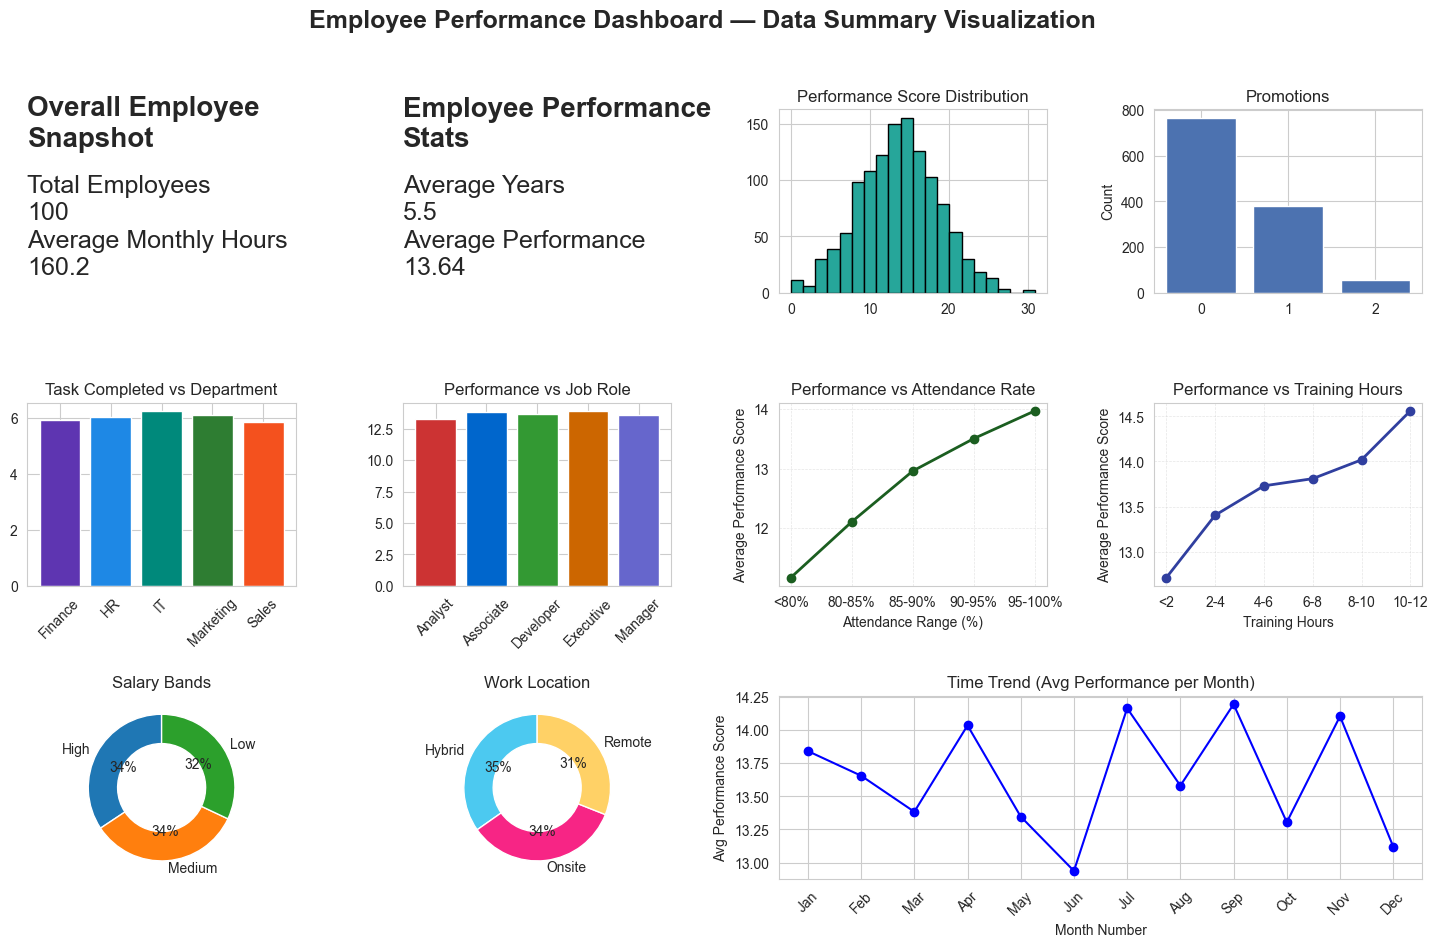

Dashboard generated and saved successfully.


In [24]:
# Visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 4, wspace=0.4, hspace=0.6)
axs = [[None]*4 for _ in range(3)]

# Normal subplots
axs[0][0] = fig.add_subplot(gs[0, 0])
axs[0][1] = fig.add_subplot(gs[0, 1])
axs[0][2] = fig.add_subplot(gs[0, 2])
axs[0][3] = fig.add_subplot(gs[0, 3])

axs[1][0] = fig.add_subplot(gs[1, 0])
axs[1][1] = fig.add_subplot(gs[1, 1])
axs[1][2] = fig.add_subplot(gs[1, 2])
axs[1][3] = fig.add_subplot(gs[1, 3])

# Last row
axs[2][0] = fig.add_subplot(gs[2, 0])
axs[2][1] = fig.add_subplot(gs[2, 1])

# ⭐ Time Trend spanning TWO columns
axs[2][3] = fig.add_subplot(gs[2, 2:4])   # spans col 2 and 3

# Leave axs[2][2] unused (since it merges into span)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig.suptitle("Employee Performance Dashboard — Data Summary Visualization", fontsize=18, fontweight='bold')

# Overall Snapshot
axs[0][0].axis("off")
axs[0][0].text(0, 0.8, "Overall Employee\nSnapshot", fontsize=20, fontweight="bold")
axs[0][0].text(0, 0.4, f"Total Employees\n{total_employees}", fontsize=18)
axs[0][0].text(0, 0.1, f"\n\nAverage Monthly Hours\n{avg_monthly_hours}", fontsize=18)

# Performance Stats
axs[0][1].axis("off")
axs[0][1].text(0, 0.8, "Employee Performance\nStats", fontsize=20, fontweight="bold")
axs[0][1].text(0, 0.4, f"Average Years\n{avg_years}", fontsize=18)
axs[0][1].text(0, 0.1, f"Average Performance\n{avg_performance}", fontsize=18)

# colors = [
#     "#7E57C2", "#42A5F5", "#26A69A", "#66BB6A", "#FF7043",
#     "#AB47BC", "#29B6F6", "#26C6DA", "#9CCC65", "#FFA726"
# ]

# Performance Distribution
axs[0][2].hist(
    df["performance_score"],
    bins=20,
    color="#26A69A",
    edgecolor="black"
)
axs[0][2].set_title("Performance Score Distribution")

# Promotions
promo_counts = df["promotions_last_3years"].value_counts().sort_index()
axs[0][3].bar(promo_counts.index.astype(str), promo_counts.values, color="#4C72B0")
axs[0][3].set_title("Promotions")
axs[0][3].set_ylabel("Count")

# Department vs Performance
dept_perf = df.groupby("department")["tasks_completed"].mean()
xcolors = [
    "#5E35B1",  # darker purple
    "#1E88E5",  # darker blue
    "#00897B",  # darker teal
    "#2E7D32",  # darker green
    "#F4511E"   # darker burnt orange
]
xcolors = xcolors[:len(dept_perf)]
axs[1][ 0].bar(dept_perf.index, dept_perf.values, color=xcolors)
axs[1][ 0].set_title("Task Completed vs Department")
axs[1][0].tick_params(axis="x", rotation=45)

# Job Role vs Performance
job_perf = df.groupby("job_role")["performance_score"].mean()
new_colors = [
    "#CC3333",  # dark red
    "#0066CC",  # dark blue
    "#339933",  # dark green
    "#CC6600",  # dark orange
    "#6666CC"   # dark lavender
]
new_colors = new_colors[:len(job_perf)]
axs[1][ 1].bar(job_perf.index, job_perf.values, color=new_colors)
axs[1][ 1].set_title("Performance vs Job Role")
axs[1][1].tick_params(axis="x", rotation=45)

# Attendance vs Performance (Line Chart)
bins = [70, 80, 85, 90, 95, 100.1]
labels = ['<80%', '80-85%', '85-90%', '90-95%', '95-100%']
df['attendance_bin'] = pd.cut(
    df['attendance_rate'],
    bins=bins,
    labels=labels,
    right=False
)
performance_by_attendance = (
    df.groupby('attendance_bin', observed=False)['performance_score']
      .mean()
      .reindex(labels)   # keep bins in correct order
      .reset_index()
)
axs[1][2].plot(
    performance_by_attendance['attendance_bin'],
    performance_by_attendance['performance_score'],
    marker='o',
    color="#1B5E20",
    linewidth=2
)
axs[1][2].set_title("Performance vs Attendance Rate")
axs[1][2].set_xlabel("Attendance Range (%)")
axs[1][2].set_ylabel("Average Performance Score")
axs[1][2].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

# Training vs Performance
# print(df['training_hours'].min(), df['training_hours'].max())
bins = [0, 2, 4, 6, 8, 10,12]
labels = ['<2', '2-4', '4-6', '6-8', '8-10','10-12']
df['training_bin'] = pd.cut(
    df['training_hours'],
    bins=bins,
    labels=labels,
    right=False
)
performance_by_training = (
    df.groupby('training_bin', observed=False)['performance_score']
      .mean()
      .reindex(labels)   # keep bins in correct order
      .reset_index()
)
axs[1][3].plot(
    performance_by_training['training_bin'],
    performance_by_training['performance_score'],
    marker='o',
    color="#303F9F",
    linewidth=2
)
axs[1][3].set_title("Performance vs Training Hours")
axs[1][3].set_xlabel("Training Hours")
axs[1][3].set_ylabel("Average Performance Score")
axs[1][3].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

# Salary Bands
salary_counts = df["salary_band"].value_counts()
axs[2][0].pie(salary_counts, labels=salary_counts.index, autopct="%.0f%%", startangle=90, wedgeprops=dict(width=0.4))
axs[2][0].set_title("Salary Bands")

# Work Location
colors = ["#4CC9F0", "#F72585", "#FFD166"]
location_counts = df["work_location"].value_counts()
axs[2][1].pie(
    location_counts,
    labels=location_counts.index,
    autopct="%.0f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
axs[2][1].set_title("Work Location")

# Time Trend
time_perf = df.groupby("month_num")["performance_score"].mean()
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
axs[2][3].plot(time_perf.index, time_perf.values, marker="o", color="blue")
axs[2][3].set_xticks(time_perf.index)
axs[2][3].set_xticklabels(month_labels[:len(time_perf.index)],rotation=45)
axs[2][3].set_title("Time Trend (Avg Performance per Month)")
axs[2][3].set_xlabel("Month Number")
axs[2][3].set_ylabel("Avg Performance Score")

# axs[2,2].axis('off')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("dashboard.png", dpi=300)
plt.show()

print("Dashboard generated and saved successfully.")